# Preprocessing Quarterly Data

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib
import urllib.request
# for vizualizations
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
#from google.colab import files
#import io


Reading in the dataset for preprocessing

In [106]:
df = pd.read_csv('sample_svcg_2006.txt', sep='|')

C:\ProgramData\Anaconda4\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Taking a peek at the top 5 rows of the dataset

In [107]:
df.head(5)

,F106Q1000086,200602,128000,0,0.1,360,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,,Unnamed: 25
0,F106Q1000086,200603,128000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F106Q1000086,200604,128000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F106Q1000086,200605,127000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F106Q1000086,200606,127000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F106Q1000086,200607,126000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


Naming the columns in the dataset to begin analysis and viewing the top 5 rows again

In [108]:
df.columns = ["LOAN SEQUENCE NUMBER","MONTHLY REPORTING PERIOD","CURRENT ACTUAL UPB","CURRENT LOAN DELINQUENCY STATUS","LOAN AGE",
               "REMAINING MONTHS TO LEGAL MATURITY","REPURCHASE FLAG","MODIFICATION FLAG","ZERO BALANCE CODE","ZERO BALANCE EFFECTIVE DATE",
               "CURRENT INTEREST RATE","CURRENT DEFERRED UPB","DUE DATE OF LAST PAID INSTALLMENT (DDLPI)","MI RECOVERIES","NET SALES PROCEEDS",
               "NON MI RECOVERIES","EXPENSES","LEGAL COSTS","MAINTENANCE AND PRESERVATION COSTS","TAXES AND INSURANCE","MISCELLANEOUS EXPENSES",
               "ACTUAL LOSS CALCULATION","MODIFICATION COST","STEP MODIFICATION FLAG","DEFERRED PAYMENT MODIFICATION","ESTIMATED LOAN TO VALUE (ELTV)"]
df.head(5)

,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,CURRENT LOAN DELINQUENCY STATUS,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,REPURCHASE FLAG,MODIFICATION FLAG,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,...,EXPENSES,LEGAL COSTS,MAINTENANCE AND PRESERVATION COSTS,TAXES AND INSURANCE,MISCELLANEOUS EXPENSES,ACTUAL LOSS CALCULATION,MODIFICATION COST,STEP MODIFICATION FLAG,DEFERRED PAYMENT MODIFICATION,ESTIMATED LOAN TO VALUE (ELTV)
0,F106Q1000086,200603,128000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
1,F106Q1000086,200604,128000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
2,F106Q1000086,200605,127000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,F106Q1000086,200606,127000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,F106Q1000086,200607,126000.0,0,5,355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


The dataset seems to have a lot of missing values, thus we shall first investigate the number of missing values in each column

In [109]:
#Investigating missing values in the dataset
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
#missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
0,LOAN SEQUENCE NUMBER,0
1,MONTHLY REPORTING PERIOD,0
2,CURRENT ACTUAL UPB,0
3,CURRENT LOAN DELINQUENCY STATUS,0
4,LOAN AGE,0
5,REMAINING MONTHS TO LEGAL MATURITY,0
6,REPURCHASE FLAG,2936251
7,MODIFICATION FLAG,2978651
8,ZERO BALANCE CODE,2936277
9,ZERO BALANCE EFFECTIVE DATE,2936277


The columns with missing values seem to be missing over 95% of the data and there is no way we can regenerate the missing values, as such we have decided to drop these columns

In [110]:
def drop_missing_values(df):
    df.drop('REPURCHASE FLAG',axis=1,inplace=True)
    df.drop('MODIFICATION FLAG',axis=1,inplace=True)
    df.drop('ZERO BALANCE CODE',axis=1,inplace=True)
    df.drop('ZERO BALANCE EFFECTIVE DATE',axis=1,inplace=True)
    df.drop('DUE DATE OF LAST PAID INSTALLMENT (DDLPI)',axis=1,inplace=True)
    df.drop('MI RECOVERIES',axis=1,inplace=True)
    df.drop('NET SALES PROCEEDS',axis=1,inplace=True)
    df.drop('NON MI RECOVERIES',axis=1,inplace=True)
    df.drop('EXPENSES',axis=1,inplace=True)
    df.drop('LEGAL COSTS',axis=1,inplace=True)
    df.drop('MAINTENANCE AND PRESERVATION COSTS',axis=1,inplace=True)
    df.drop('TAXES AND INSURANCE',axis=1,inplace=True)
    df.drop('MISCELLANEOUS EXPENSES',axis=1,inplace=True)
    df.drop('ACTUAL LOSS CALCULATION',axis=1,inplace=True)
    df.drop('MODIFICATION COST',axis=1,inplace=True)
    df.drop('STEP MODIFICATION FLAG',axis=1,inplace=True)
    df.drop('ESTIMATED LOAN TO VALUE (ELTV)',axis=1,inplace=True)
    df['DELINQUENT']=['N' if x == '0' else 'Y' for x in df['CURRENT LOAN DELINQUENCY STATUS']]
    df.drop('DEFERRED PAYMENT MODIFICATION',axis=1,inplace=True)
    df.drop('CURRENT LOAN DELINQUENCY STATUS',axis=1,inplace=True)
    df['REPORTING YEAR'] =  [int(str(d)[:4]) for d in df['MONTHLY REPORTING PERIOD']]
    return df

Extracting the new dataset after deleting all the empty columns

In [111]:
val = drop_missing_values(df)

In [112]:
val.head()

,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,CURRENT INTEREST RATE,CURRENT DEFERRED UPB,DELINQUENT,REPORTING YEAR
0,F106Q1000086,200603,128000.0,1,359,6.375,0.0,N,2006
1,F106Q1000086,200604,128000.0,2,358,6.375,0.0,N,2006
2,F106Q1000086,200605,127000.0,3,357,6.375,0.0,N,2006
3,F106Q1000086,200606,127000.0,4,356,6.375,0.0,N,2006
4,F106Q1000086,200607,126000.0,5,355,6.375,0.0,N,2006


Looking at the shape of the new output

In [113]:
val.shape

(2981800, 9)

# Feature Exploration

What is the distribution of loans amounts in the dataset

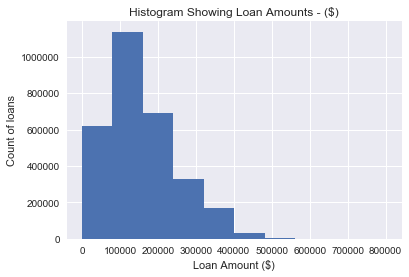

count    2.981800e+06
mean     1.573209e+05
std      9.217480e+04
min      0.000000e+00
25%      8.916019e+04
50%      1.395114e+05
75%      2.090000e+05
max      8.020000e+05
Name: CURRENT ACTUAL UPB, dtype: float64


In [114]:
val['CURRENT ACTUAL UPB'].plot(kind='hist')
plt.title('Histogram Showing Loan Amounts - ($)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count of loans')
plt.show()

print(val['CURRENT ACTUAL UPB'].describe())

The maximum loan amount is about 800k while the average loan amount in the quarter was about 157k

# Loan Age

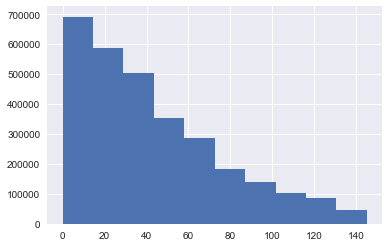

In [115]:
val['LOAN AGE'].hist()

C:\ProgramData\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


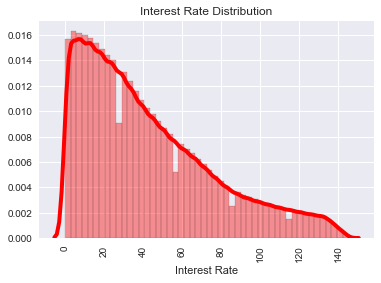

count    2.981800e+06
mean     4.269570e+01
std      3.372185e+01
min      0.000000e+00
25%      1.600000e+01
50%      3.400000e+01
75%      6.200000e+01
max      1.450000e+02
Name: LOAN AGE, dtype: float64


In [116]:
# Histogram and density chart
sns.distplot(val['LOAN AGE'], hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
#plt.ylabel('Number of people')
plt.show()

print(val['LOAN AGE'].describe())

Over 80% of the loans are less than 5 years old

# Delinquency

In [117]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].astype('category')

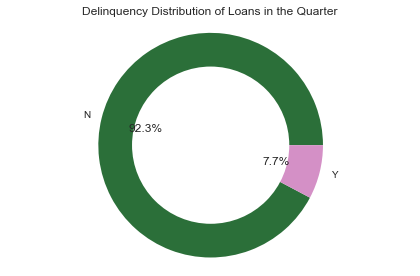

N    2750967
Y     230833
Name: DELINQUENT, dtype: int64

In [118]:
p_categories = val['DELINQUENT'].cat.categories.tolist()
# Circle chart
fig1, ax1 = plt.subplots()
ax1.pie(val['DELINQUENT'].value_counts().sort_index().tolist(),
        labels=p_categories,
        autopct='%1.1f%%',
        colors= sns.color_palette("cubehelix", 2))

ax1.axis('equal')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.xticks(rotation=90)
plt.title('Delinquency Distribution of Loans in the Quarter')
plt.tight_layout()
plt.show()
val['DELINQUENT'].value_counts()

Only 7.7% of the loans in the quarter are non performing (delinquent)

# Remaining Months to Legal Maturity

count    2.981800e+06
mean     2.995063e+02
std      7.389236e+01
min     -1.000000e+00
25%      2.810000e+02
50%      3.220000e+02
75%      3.440000e+02
max      6.030000e+02
Name: REMAINING MONTHS TO LEGAL MATURITY, dtype: float64


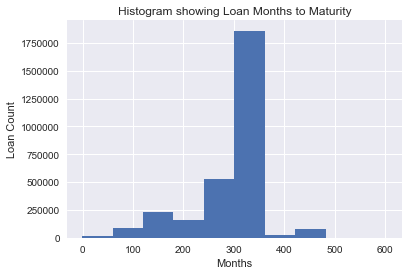

In [119]:
val['REMAINING MONTHS TO LEGAL MATURITY'].hist()
plt.title('Histogram showing Loan Months to Maturity')
plt.xlabel('Months')
plt.ylabel('Loan Count')
print(val['REMAINING MONTHS TO LEGAL MATURITY'].describe())

One loan had been completely paid off before time, while the average months to legal maturity was about 300 months

# CURRENT DEFERRED UPB

In [120]:
val['CURRENT DEFERRED UPB'].describe()


count    2.981800e+06
mean     6.380236e+02
std      7.164403e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.710000e+05
Name: CURRENT DEFERRED UPB, dtype: float64

The mean non interest bearing loan amount during the quarter was 0, this means that almost all the mortgage loans in the dataset had no non interest bearing percentages 

# Interest Rate

C:\ProgramData\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


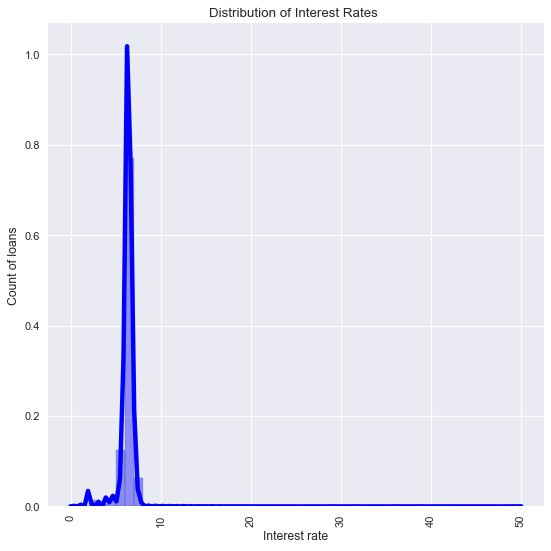

count    2.981800e+06
mean     6.270802e+00
std      7.564623e-01
min      0.000000e+00
25%      6.125000e+00
50%      6.375000e+00
75%      6.625000e+00
max      5.000000e+01
Name: CURRENT INTEREST RATE, dtype: float64


In [121]:
plt.figure(figsize=(8, 8), dpi=80)

sns.distplot(val['CURRENT INTEREST RATE'], hist=True, kde=True, 
             bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Distribution of Interest Rates ')
plt.xlabel('Interest rate')
plt.ylabel('Count of loans')
plt.show()

print(val['CURRENT INTEREST RATE'].describe())

The highest interest rate was about 50%. Overall the interest rate for the loans in the dataset was between 0 and 10%

# MONTHLY REPORTING PERIOD

In [125]:
val['REPORTING YEAR'].value_counts()

2007    548494
2008    495741
2009    411428
2010    326258
2011    258029
2006    247850
2012    202146
2013    142327
2014    109581
2015     89764
2016     74401
2017     61966
2018     13815
Name: REPORTING YEAR, dtype: int64

In [134]:
lists_yes = [0] *13
lists_no = [0] *13
for i in range(val.shape[0]):
    if val['DELINQUENT'][i] == 'Y':
        lists_yes[val['REPORTING YEAR'][i]-2006]=lists_yes[val['REPORTING YEAR'][i]-2006]+1
    else:
        lists_no[val['REPORTING YEAR'][i]-2006]=lists_no[val['REPORTING YEAR'][i]-2006]+1
        
    

In [138]:
lists_no

[246376,
 540322,
 479286,
 379631,
 287872,
 224137,
 173063,
 119398,
 92507,
 77270,
 64772,
 54357,
 11976]

In [140]:
 
 lists_yes

[1474,
 8172,
 16455,
 31797,
 38386,
 33892,
 29083,
 22929,
 17074,
 12494,
 9629,
 7609,
 1839]